# ASSESSMENT 3-Classification Algorithm

Diabetes Dataset can be downloaded from https://www.kaggle.com/uciml/pima-indians-diabetes-database

# Decision tree Classification 


A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning.

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.

In [1]:
#Importing the packages
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz# Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("E:/AI & ML NEHA/winter main/data mining/lab/diabetes.csv", header=None, names=col_names,skiprows=1)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100) # 90% training and 10% test

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=100)



In [7]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)



In [8]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 77.92207792207793


C:\Users\nehrj\anaconda3\lib\site-packages\sklearn\tree\_export.py:183: FutureWarning: 'rotate' has no effect and is deprecated in 0.23. It will be removed in 0.25.
  warnings.warn(("'rotate' has no effect and is deprecated in 0.23. "


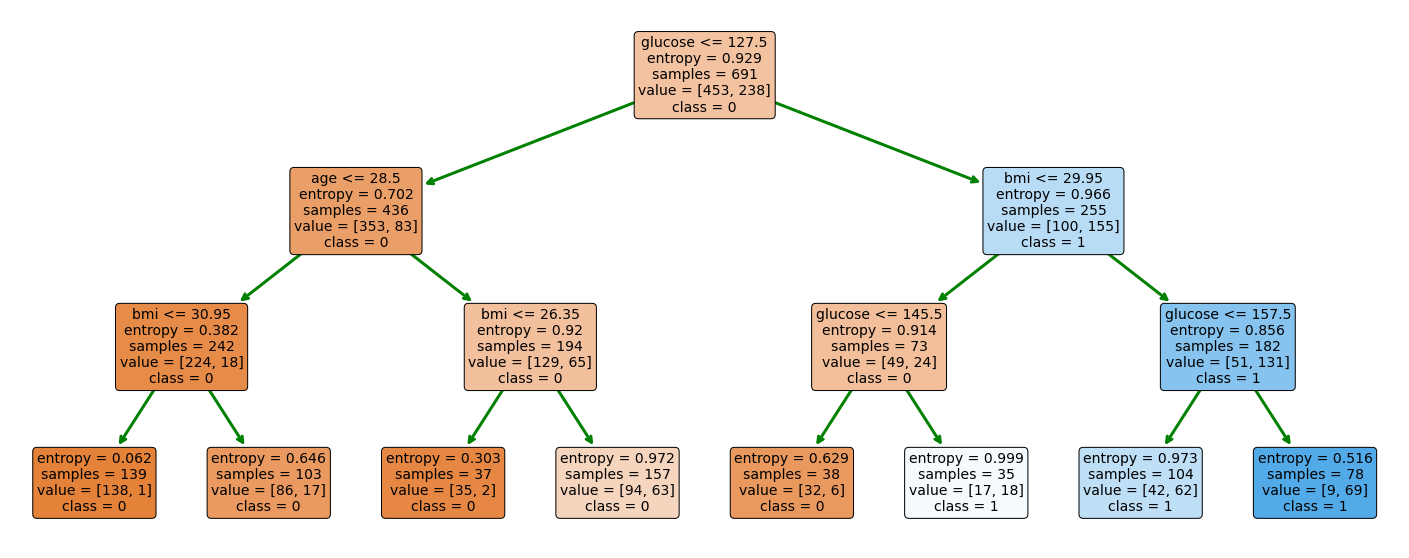

In [11]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,10))
out = plot_tree(clf, 
              feature_names = feature_cols,class_names=['0','1'], 
              filled=True, 
              rounded=True, 
              fontsize=14,rotate=False)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('green')
        arrow.set_linewidth(3)

In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        47
           1       0.76      0.63      0.69        30

    accuracy                           0.78        77
   macro avg       0.77      0.75      0.76        77
weighted avg       0.78      0.78      0.77        77



# Pros of decision tree

Decision trees are easy to interpret and visualize.
It can easily capture Non-linear patterns.
It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
It can be used for feature engineering such as predicting missing values, suitable for variable selection.
The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.

# Cons of decision tree

Sensitive to noisy data. It can overfit noisy data.
The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

-------------------------------------------------------------------------------------------------------------------------------

# NAIVE BAYES

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

# Types of Naive Bayes Classifier:

# Multinomial Naive Bayes:

This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.

# Bernoulli Naive Bayes:


This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.

# Gaussian Naive Bayes:


When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

In [14]:
#Importing the packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [15]:
#load the dataset
df = pd.read_csv("E:/AI & ML NEHA/winter main/data mining/lab/diabetes.csv", header=None, names=col_names,skiprows=1)

In [16]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100) # 90% training and 30% test

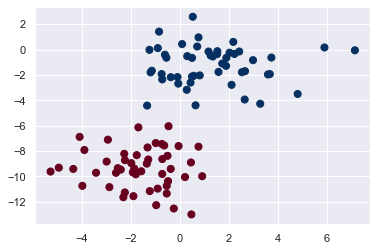

In [17]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [18]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

GaussianNB()

In [19]:
#Compute the predictions or Y hat
y_pred=gnb.predict(X_test)

In [20]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
print("Accuracy of Naive Bayes classifier:")
accuracy_score(y_test,y_pred)*100

Accuracy of Naive Bayes classifier:


72.72727272727273

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        47
           1       0.67      0.60      0.63        30

    accuracy                           0.73        77
   macro avg       0.71      0.70      0.71        77
weighted avg       0.72      0.73      0.72        77



Naive Bayes algorithms are mostly used in sentiment analysis, spam filtering, recommendation systems etc. They are fast and easy to implement but their biggest disadvantage is that the requirement of predictors to be independent. In most of the real life cases, the predictors are dependent, this hinders the performance of the classifier.

Github Link: https://github.com/nehrjv/Data-warehousing-and-mining-lab/tree/main/Assessment-3